# Survival Analysis of Patients with Primary Biliary Cholangitis
---
Author: Isaac Lam

## Background
### Primary Biliary Cholangitis (PBC)
Primary Biliary Cholangitis (PBC), also referred to as Primary Biliary Cirrhosis, is a chronic autoimmune liver disease characterized by the progressive destruction of the small bile ducts within the liver. This destruction leads to cholestasis, a condition where bile accumulates in the liver, causing inflammation and eventually leading to liver cirrhosis and failure if left untreated.

**Etiology**</br>
PBC is an autoimmune disorder. The exact cause of PBC is unclear, but it is widely believed to be a result of a combination of genetic predisposition and environmental triggers. Some studies suggest that infections or exposure to certain chemicals may trigger the disease in genetically susceptible individuals (Pandit & Samant, 2023).

**Clinical Presentation**</br>
Patients with PBC often present with symptoms such as fatigue, pruritus (itching), and jaundice. However, some patients may be asymptomatic and are diagnosed through abnormal liver function tests during routine check-ups.

**Diagnosis**</br>
The diagnosis of PBC is generally based on a combination of clinical symptoms, biochemical tests, and histological findings. Anti-mitochondrial antibodies (AMAs) are present in 90-95% of cases, making them a key diagnostic marker (Lindor et al., 2009).

**Treatment**</br>
The primary treatment for PBC is ursodeoxycholic acid (UDCA), which has been shown to improve liver function tests and slow disease progression. In cases where UDCA is not effective or the disease is advanced, liver transplantation may be considered (Carbone et al., 2013).

**Prognosis**</br>
The outlook for patients with primary biliary cholangitis can differ widely, influenced by both the stage of diagnosis and the effectiveness of treatment. Detecting and treating the disease early can have a substantial positive impact on long-term outcomes. Key factors for assessing a patient's prognosis include elevated levels of serum bilirubin and the Mayo risk score (Pandit & Samant, 2023). Additionally, research has suggested that the degree of fatigue experienced by the patient may also serve as an indicator of the disease's prognosis (Björnsson et al., 2010).

### Survival Analysis
Survival Analysis helps in monitoring disease progress and determining the likely outcome for individuals with PBC. This provides valuable information to both patients and healthcare providers in making informed decisions about treatment and care. Survival analysis can aid in the selection of appropriate treatment strategies by comparing the survival rates and hazard ratios of competing treatment regimes. Furthermore, it can also identify factors that influence the survival of cirrhosis patients. This information can be used to tailor interventions and preventative measures.

In this project, we will compare the survival rates of PBC patients who received D-Penicillamine treatment versus patients who received a placebo drug in a clinical trial. </br>
In addition, we will identify factors that have an impact on the survival of cirrhosis patients.

### About the Dataset
A randomized, placebo-controlled trial involving D-penicillamine was carried out with primary biliary cirrhosis (PBC) patients referred to the Mayo Clinic during the years spanning from 1974 to 1984. Out of a total of 424 PBC patients who met the eligibility criteria for the trial, 312 actively participated in the trial, while an additional 112, although not directly involved in the trial, consented to have basic measurements recorded and to be monitored for survival. Out of these 112 participants, 6 were lost to follow-up shortly after their initial diagnosis. The [dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset/data) under examination includes data from the 312 individuals who actively partook in the trial and the additional 106 individuals whose data was recorded as part of the study (Fedesoriano, 2021).

**Attribute Information**
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

**Acknowledgements** </br>
The dataset can be found in appendix D of:

>Fleming, T.R. and Harrington, D.P. (1991) Counting Processes and Survival Analysis. Wiley Series in Probability and Mathematical Statistics: Applied Probability and Statistics, John Wiley and Sons Inc., New York.

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\isaac\OneDrive\Documents\Projects\datasets\cirrhosis.csv")
df.columns = df.columns.str.lower()

In [2]:
print(df.info(verbose = True, max_cols = 99, show_counts = True))
print('')

#check for duplicates
print('Duplicates Present: {}'.format(df.duplicated(subset = 'id').any()))
df.drop('id', axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             418 non-null    int64  
 1   n_days         418 non-null    int64  
 2   status         418 non-null    object 
 3   drug           312 non-null    object 
 4   age            418 non-null    int64  
 5   sex            418 non-null    object 
 6   ascites        312 non-null    object 
 7   hepatomegaly   312 non-null    object 
 8   spiders        312 non-null    object 
 9   edema          418 non-null    object 
 10  bilirubin      418 non-null    float64
 11  cholesterol    284 non-null    float64
 12  albumin        418 non-null    float64
 13  copper         310 non-null    float64
 14  alk_phos       312 non-null    float64
 15  sgot           312 non-null    float64
 16  tryglicerides  282 non-null    float64
 17  platelets      407 non-null    float64
 18  prothrombi

In [3]:
df.rename(columns = {'alk_phos': 'alp', 'sgot': 'ast', 'tryglicerides': 'triglycerides'}, inplace = True)
df.columns

Index(['n_days', 'status', 'drug', 'age', 'sex', 'ascites', 'hepatomegaly',
       'spiders', 'edema', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'alp', 'ast', 'triglycerides', 'platelets', 'prothrombin', 'stage'],
      dtype='object')

In [4]:
#data distribution
print(df.describe())
print(df.describe(include = object))

            n_days           age   bilirubin  cholesterol     albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           copper           alp         ast  triglycerides   platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000   

In [5]:
# check how many missing values
def count_missing(df):
    na_df = pd.DataFrame(index = df.columns, columns = ['missing'])
    for i, column in enumerate(df.columns):
        na_df.iloc[i] = df[column].isna().sum()
    return na_df

print(count_missing(df))

              missing
n_days              0
status              0
drug              106
age                 0
sex                 0
ascites           106
hepatomegaly      106
spiders           106
edema               0
bilirubin           0
cholesterol       134
albumin             0
copper            108
alp               106
ast               106
triglycerides     136
platelets          11
prothrombin         2
stage               6


This dataset does not contain any duplicate entries, but it is evident that there are instances of missing values. Some of these missing data points correspond to patients who did not provide consent or participate in the clinical trial, resulting in unrecorded measurements. </br>

<Axes: xlabel='stage', ylabel='count'>

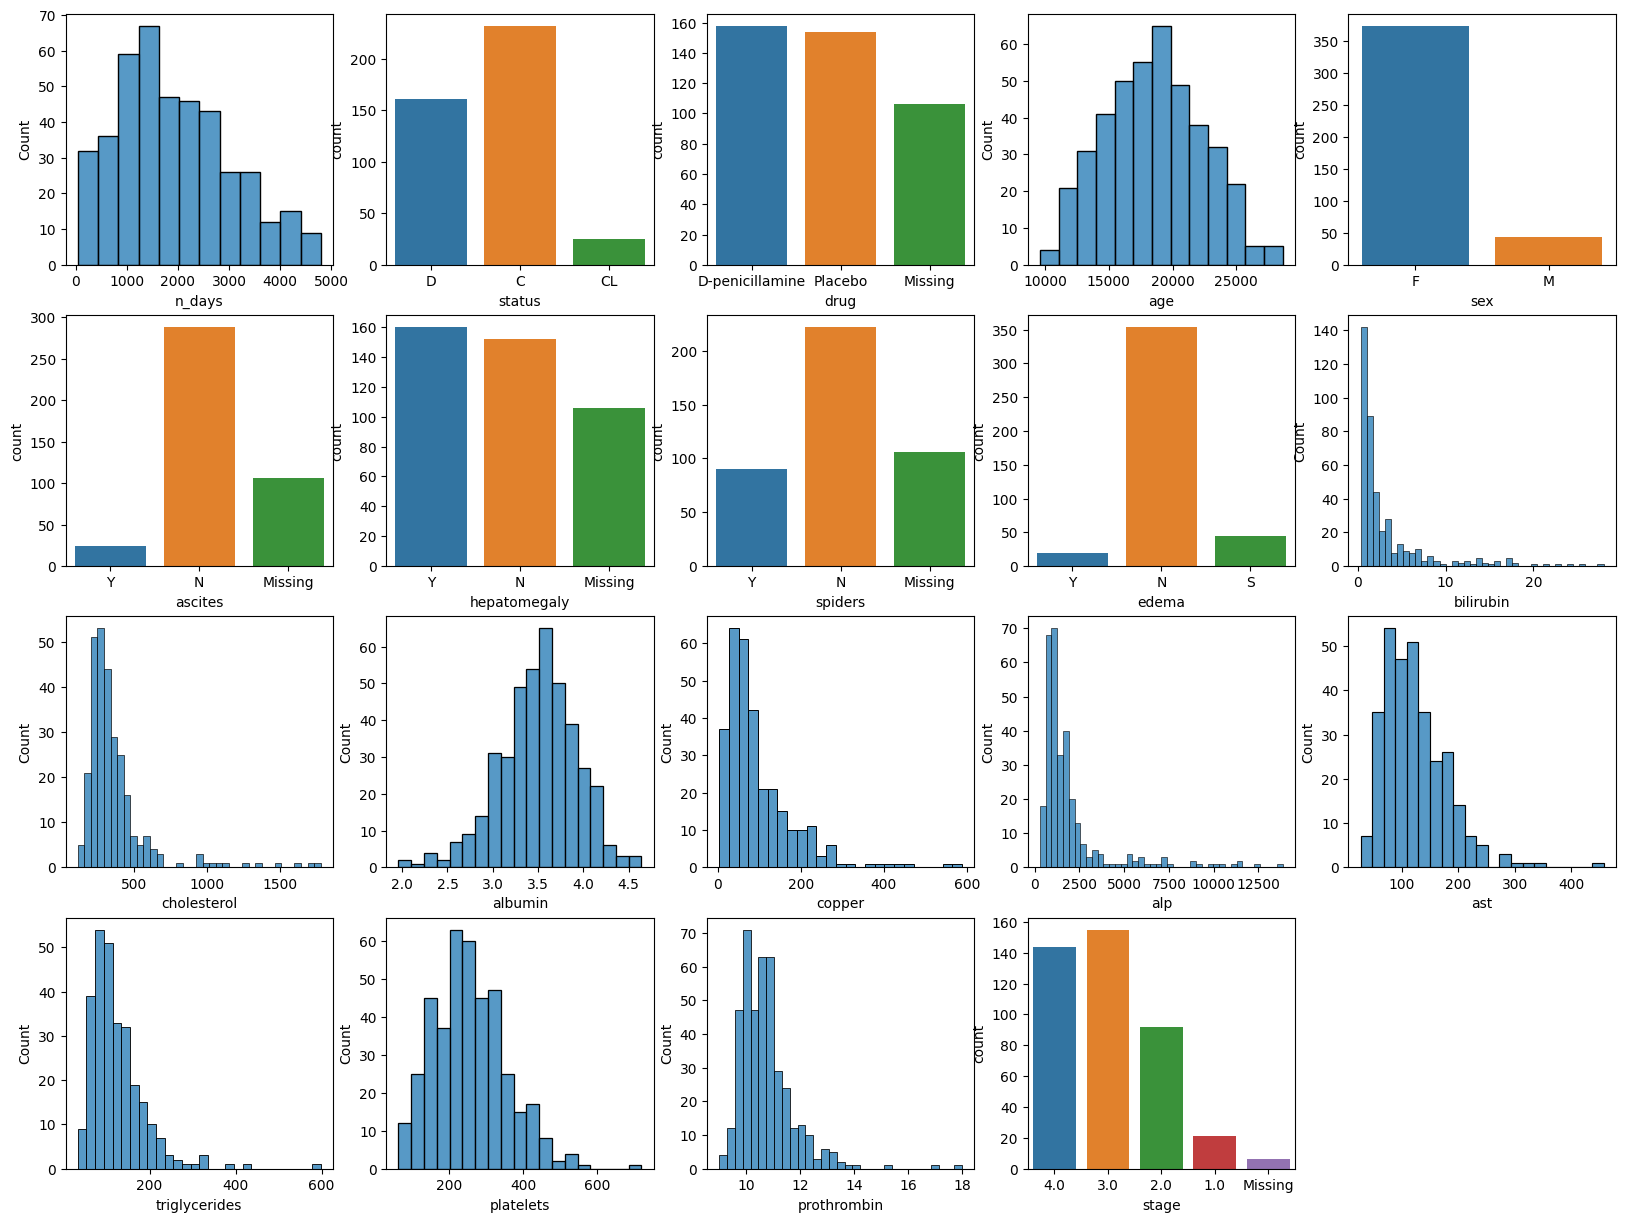

In [6]:
#visualize distributions
plt.figure(figsize = (20,15))
plt.subplot(4,5,1)
sns.histplot(df.n_days)
plt.subplot(4,5,2)
sns.countplot(x = df.status.fillna('Missing'))
plt.subplot(4,5,3)
sns.countplot(x = df.drug.fillna('Missing'))
plt.subplot(4,5,4)
sns.histplot(df.age)
plt.subplot(4,5,5)
sns.countplot(x = df.sex.fillna('Missing'))
plt.subplot(4,5,6)
sns.countplot(x = df.ascites.fillna('Missing'))
plt.subplot(4,5,7)
sns.countplot(x = df.hepatomegaly.fillna('Missing'))
plt.subplot(4,5,8)
sns.countplot(x = df.spiders.fillna('Missing'))
plt.subplot(4,5,9)
sns.countplot(x = df.edema.fillna('Missing'))
plt.subplot(4,5,10)
sns.histplot(df.bilirubin)
plt.subplot(4,5,11)
sns.histplot(df.cholesterol)
plt.subplot(4,5,12)
sns.histplot(df.albumin)
plt.subplot(4,5,13)
sns.histplot(df.copper)
plt.subplot(4,5,14)
sns.histplot(df.alp)
plt.subplot(4,5,15)
sns.histplot(df.ast)
plt.subplot(4,5,16)
sns.histplot(df.triglycerides)
plt.subplot(4,5,17)
sns.histplot(df.platelets)
plt.subplot(4,5,18)
sns.histplot(df.prothrombin)
plt.subplot(4,5,19)
sns.countplot(x= df.stage.fillna('Missing'))



Examining the distribution of characteristics in our sample reveals a gender disparity, which is consistent with the known prevalence of the disease. The condition is more frequently observed in females than in males, with a ratio of approximately 9:1 (Pandit & Samant, 2023).

Text(0.5, 1.0, 'Deaths')

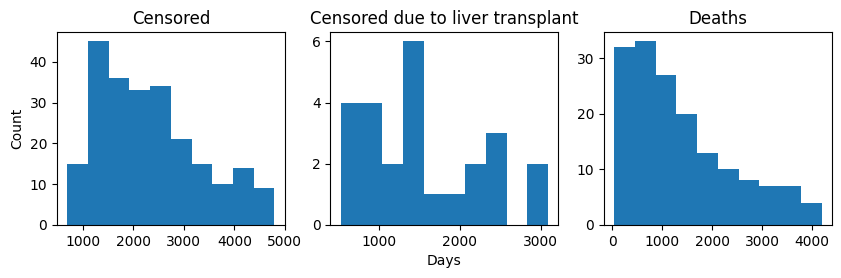

In [7]:
# visualize censored
df_c = df[df.status == 'C']
df_cl = df[df.status == 'CL']
df_d = df[df.status == 'D']

plt.figure(figsize = (10, 2.5))

plt.subplot(1,3,1)
plt.hist(df_c.n_days)
plt.title('Censored')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(df_cl.n_days)
plt.title('Censored due to liver transplant')
plt.xlabel('Days')

plt.subplot(1,3,3)
plt.hist(df_d.n_days)
plt.title('Deaths')


In [8]:
# change age from days to years
df.age = round(df.age/365)


In [9]:
#drug
df.loc[df.drug == 'Placebo', 'drug'] = 0
df.loc[df.drug == 'D-penicillamine', 'drug'] = 1 

#sex 
df.loc[df.sex == 'F', 'sex'] = 0
df.loc[df.sex == 'M', 'sex'] = 1

#ascites
df.loc[df.ascites == 'N', 'ascites'] = 0
df.loc[df.ascites == 'Y', 'ascites'] = 1

#hepatomegaly
df.loc[df.hepatomegaly == 'N', 'hepatomegaly'] = 0
df.loc[df.hepatomegaly == 'Y', 'hepatomegaly'] = 1

#spiders
df.loc[df.spiders == 'N', 'spiders'] = 0
df.loc[df.spiders == 'Y', 'spiders'] = 1

#edema
df.loc[df.edema == 'N', 'edema'] = 0
df.loc[df.edema == 'S', 'edema'] = 1
df.loc[df.edema == 'Y', 'edema'] = 2

#censored - combine C and CL
df.loc[(df.status == 'C') | (df.status == 'CL'), 'status'] = 0
df.loc[df.status == 'D', 'status'] = 1

In [10]:
#create category to indicate whether example is a trial participant
df['non_participant'] = df.drug.isna()
len(df[df.non_participant == True]) == df.drug.isna().sum()

True

## Feature Engineering

### Mode imputation for categorical variables

In [11]:
from sklearn.impute import SimpleImputer
modeimputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[['ascites', 'hepatomegaly', 'spiders', 'stage']] = modeimputer.fit_transform(df[['ascites', 'hepatomegaly', 'spiders', 'stage']])
df.drug.fillna(0, inplace = True) #drug probably not given to non-trial participants

In [12]:
#check imputation
print(df.ascites.value_counts(dropna = False))
print(df.hepatomegaly.value_counts(dropna = False))
print(df.spiders.value_counts(dropna = False))
print(df.stage.value_counts(dropna = False))

0    394
1     24
Name: ascites, dtype: int64
1    266
0    152
Name: hepatomegaly, dtype: int64
0    328
1     90
Name: spiders, dtype: int64
3.0    161
4.0    144
2.0     92
1.0     21
Name: stage, dtype: int64


In [13]:
#create dummy variables for edema
df = pd.get_dummies(df, columns = ['edema'], drop_first = True)
columns = df.columns
print(columns)

Index(['n_days', 'status', 'drug', 'age', 'sex', 'ascites', 'hepatomegaly',
       'spiders', 'bilirubin', 'cholesterol', 'albumin', 'copper', 'alp',
       'ast', 'triglycerides', 'platelets', 'prothrombin', 'stage',
       'non_participant', 'edema_1', 'edema_2'],
      dtype='object')


C:\Users\isaac\AppData\Local\Temp\ipykernel_14272\1631829811.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns = ['edema'], drop_first = True)


In [14]:
#recheck missing values
print(count_missing(df))

                missing
n_days                0
status                0
drug                  0
age                   0
sex                   0
ascites               0
hepatomegaly          0
spiders               0
bilirubin             0
cholesterol         134
albumin               0
copper              108
alp                 106
ast                 106
triglycerides       136
platelets            11
prothrombin           2
stage                 0
non_participant       0
edema_1               0
edema_2               0


### Multivariate Imputation By Chained Equations algorithm (MICE) imputation for continuous variables
Multiple Imputation by Chained Equations (MICE) is an imputation technique to handle missing data. Instead of filling each missing value once, MICE imputes them multiple times, creating several complete datasets. The process involves iteratively modeling each variable with missing values as a function of other variables, then imputing the missing values based on this model. This approach captures the uncertainty in imputation, offering more robust results than single imputation methods.

In the sklearn IterativeImputer API, the default estimator is bayesian ridge.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(initial_strategy = 'median', min_value = 0)

df = imputer.fit_transform(df)

In [16]:
df = pd.DataFrame(df, columns = columns)
df.head()

,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,bilirubin,cholesterol,...,copper,alp,ast,triglycerides,platelets,prothrombin,stage,non_participant,edema_1,edema_2
0,400.0,1.0,1.0,59.0,0.0,1.0,1.0,1.0,14.5,261.0,...,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0.0,0.0,1.0
1,4500.0,0.0,1.0,56.0,0.0,0.0,1.0,1.0,1.1,302.0,...,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0.0,0.0,0.0
2,1012.0,1.0,1.0,70.0,1.0,0.0,0.0,0.0,1.4,176.0,...,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0.0,1.0,0.0
3,1925.0,1.0,1.0,55.0,0.0,0.0,1.0,1.0,1.8,244.0,...,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0.0,1.0,0.0
4,1504.0,0.0,0.0,38.0,0.0,0.0,1.0,1.0,3.4,279.0,...,143.0,671.0,113.15,72.0,136.0,10.9,3.0,0.0,0.0,0.0


<Axes: xlabel='stage', ylabel='count'>

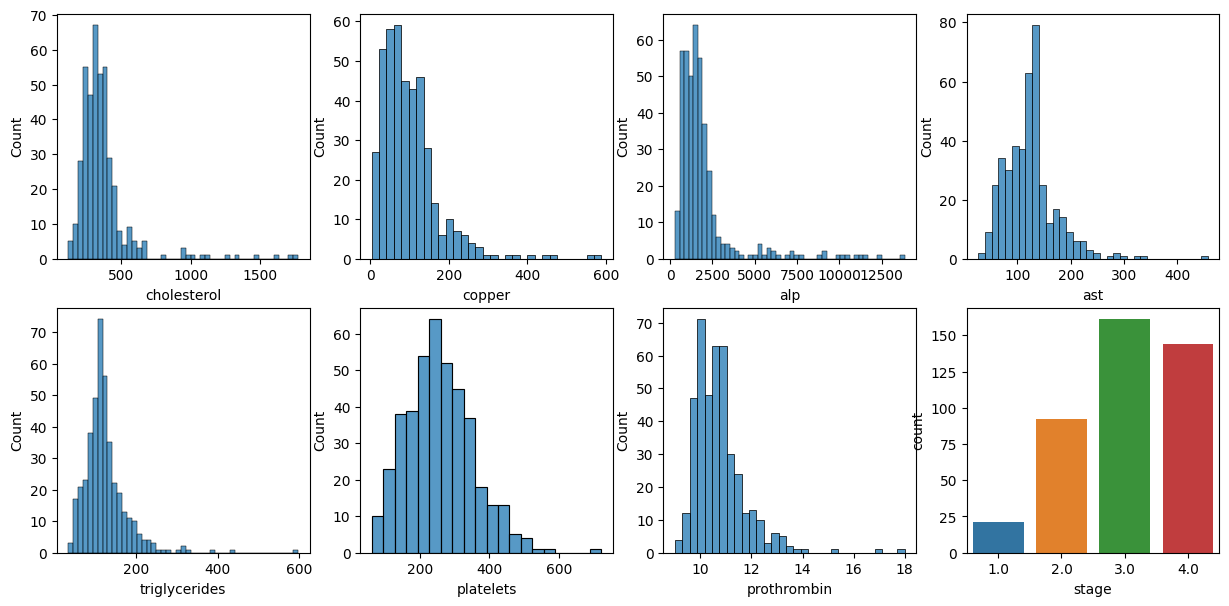

In [17]:
#visualize data distributions post-imputation
plt.figure(figsize = (15,7))
plt.subplot(2,4,1)
sns.histplot(df.cholesterol)
plt.subplot(2,4,2)
sns.histplot(df.copper)
plt.subplot(2,4,3)
sns.histplot(df.alp)
plt.subplot(2,4,4)
sns.histplot(df.ast)
plt.subplot(2,4,5)
sns.histplot(df.triglycerides)
plt.subplot(2,4,6)
sns.histplot(df.platelets)
plt.subplot(2,4,7)
sns.histplot(df.prothrombin)
plt.subplot(2,4,8)
sns.countplot(x = df.stage)

In [18]:
# recheck missing values
print(count_missing(df))

                missing
n_days                0
status                0
drug                  0
age                   0
sex                   0
ascites               0
hepatomegaly          0
spiders               0
bilirubin             0
cholesterol           0
albumin               0
copper                0
alp                   0
ast                   0
triglycerides         0
platelets             0
prothrombin           0
stage                 0
non_participant       0
edema_1               0
edema_2               0


## Kaplan-Meier Estimator
The Kaplan-Meier estimator is a non-parametric method to estimate the survival function from lifetime data. It's often used in medical research to measure the fraction of patients living for a certain amount of time after treatment, but can be applied in many other fields as well.

The Kaplan-Meier survival survival function $S(t)$ is given by: </br>
$ \Large S(t) = \Pi_{i:t_i\underline<t} (1 - \frac{d_i}{n_i})$

Where:</br>
- $ti$ are the distinct event times observed in the dataset(ordered in increasing manner)
- $di$ is the number of events (e.g., deaths) at time $ti$.
- $ni$ is the number of subjects at risk of the event just before time $ti$.

The product is over all times $ti$ up to time $t$.

In additiion, the Kaplan-Meier method takes into account censoring, where some subjects might leave the study or are observed without having the event occur by the end of the study period. The method accounts for these subjects in the $ni$ term but does not consider them as events in $di$.

By plotting $S(t)$ against time $t$, we get the Kaplan-Meier survival curve, which provides a stepwise estimate of the survival function.

## Log-Rank Test
The log-rank test is used to statistically determine if the survival curves of two groups are significantly different. The basic idea is to compare the observed number of events (like deaths) in each group at each time point to what we would expect if there were no difference between groups.

let $O_{j}(t_i)$ and $E_{j}(t_i)$ denote the observed and expected number of events in $j$ groups respectively, at time $t$. 

At each time point:</br>

Calculate the expected number of events for each group $j$, where: </br>
$\large E_{j}(t_i) = \frac{R(t_i) \times O(t_i)}{R(t_i)}$
</br>

Sum the observed and expected number of events over all time points for each group $j$: </br>
$\large O_{j} = \sum O_{j}(t_i)$ </br>
$\large E_{j} = \sum E_{j}(t_i)$ 

The test statistic for the log-rank test is:</br>
$\large X^2 = \sum_{j=1}^k \frac{[O_{j} - E_{j}]^2}{E_{j}}$


The result is a test statistic that follows a chi-squared ($X^2$) distribution with (k-1) degrees of freedom, where k is the number of groups being compared. 
If the test statistic is significantly large, the null hypothesis would be rejected, indicating that there is a significant difference between the survival curves of the groups.

**Null Hypothesis**: The survival curves of the groups are the same. </br>
**Alternative Hypothesis**: At least one group's survival curve is different from the others.

In [21]:
# kaplan meier plots and estimation
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

def kmplot_logranktest(df, var, label1, label2, ci_show = True, exclude_np = False):
    #seperate to groups
    if exclude_np == True:
        group1 = df[(df[var] == 0) & (df.non_participant != 1)] 
        group2 = df[(df[var] == 1) & (df.non_participant != 1)]
    
    else:
        group1 = df[df[var] == 0] 
        group2 = df[df[var] == 1]
    
    #km plots
    kmf = KaplanMeierFitter()
    kmf.fit(group1.n_days, group1.status, label = label1)
    kmf.plot(ci_show = ci_show)
    kmf.fit(group2.n_days, group2.status, label = label2)
    kmf.plot(ci_show = ci_show)
    
    plt.title('Kaplan Meier Survival Estimates')
    plt.xlabel('Days')
    plt.ylabel('Survival Probability')
    
    #logrank test
    results = logrank_test(group1.n_days, group2.n_days, event_observed_A = group1.status, event_observed_b = group2.status)
    print('===log-rank test===')
    print(f'test statistic: {results.test_statistic}')
    print(f'p_value: {results.p_value}')

===log-rank test===
test statistic: 40.73584920583885
p_value: 1.7426077946477629e-10


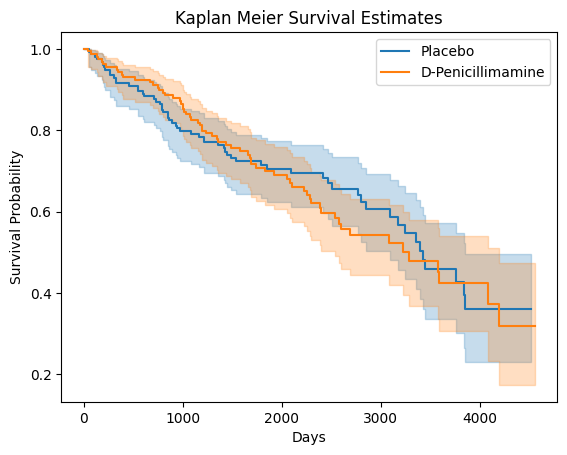

In [22]:
# drug
kmplot_logranktest(df, 'drug', 'Placebo', 'D-Penicillimamine', exclude_np = True)

Based on the visual interpretation of the graph and the statistical evidence provided by the log-rank test, there is a significant difference in the survival curves of the two groups under study (*p* < 0.01). Initially, patients treated with D-Penicillamine exhibited better survival rates compared to those receiving a placebo. However, this trend reverses after around 1600 days, with the survival rates of the D-Penicillamine group deteriorating relative to the placebo group. Eventually, as time progresses, the survival rates of both groups appear to converge, becoming nearly equal in the later stages of observation.

===log-rank test===
test statistic: 33.980740139614674
p_value: 5.566031408112147e-09


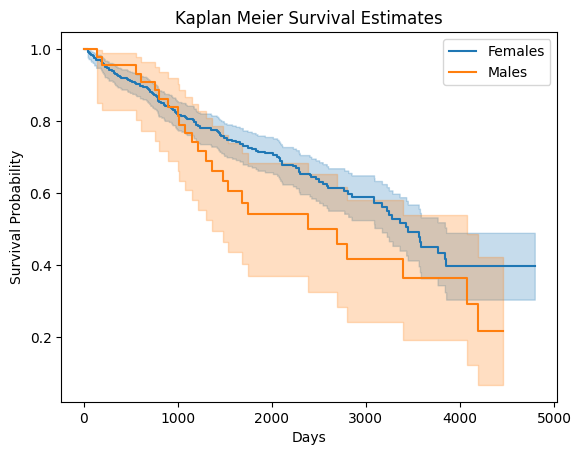

In [23]:
#sex
kmplot_logranktest(df, 'sex', 'Females', 'Males')

===log-rank test===
test statistic: 109.41886318352363
p_value: 1.3137340531743496e-25


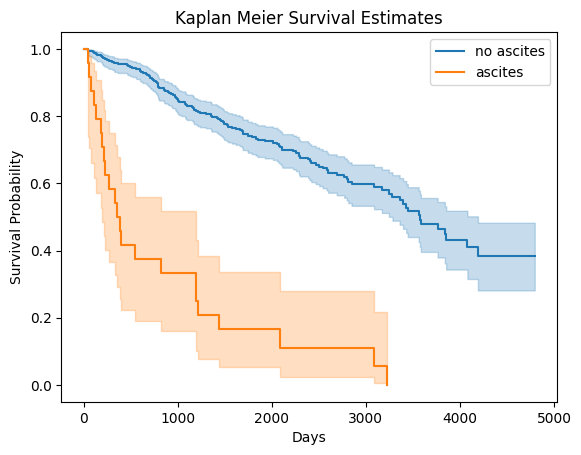

In [24]:
#ascites
kmplot_logranktest(df, 'ascites', 'no ascites', 'ascites')

===log-rank test===
test statistic: 147.8267970303309
p_value: 5.175980189118977e-34


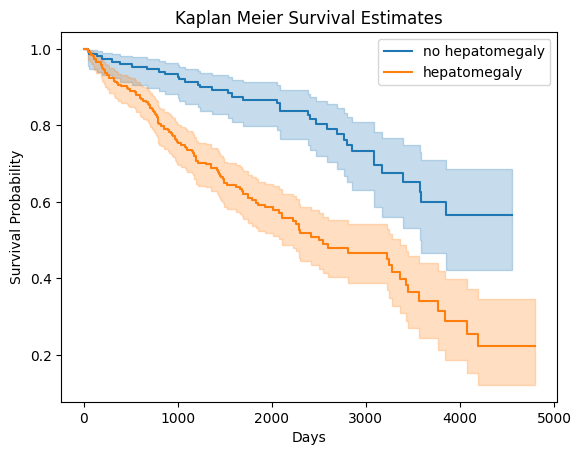

In [25]:
#hepatomegaly
kmplot_logranktest(df, 'hepatomegaly', 'no hepatomegaly', 'hepatomegaly')

===log-rank test===
test statistic: 115.58556591500619
p_value: 5.8576333413955856e-27


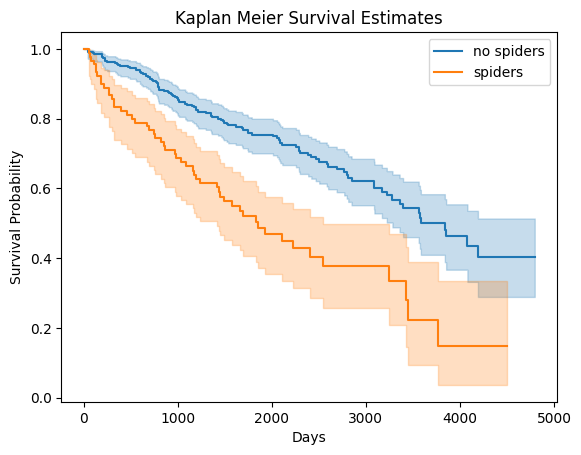

In [26]:
#spiders
kmplot_logranktest(df, 'spiders', 'no spiders', 'spiders')

===multivariate logrank test===
test statistic: 68.3024818213053
p-value: 9.855692238530847e-15

===pairwise logrank test===
<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
         test_statistic      p  -log2(p)
1.0 2.0            2.61   0.11      3.23
    3.0            6.23   0.01      6.31
    4.0           17.37 <0.005     14.99
2.0 3.0            4.37   0.04      4.77
    4.0           38.56 <0.005     30.81
3.0 4.0           30.73 <0.005     25.00>
Bonferroni adjusted critical value: 0.00208

===p-values of pairwise logrank tests===
0.10637862699099172
0.012569897162934057
3.0698728601065e-05
0.036651914703888414
5.303920972146023e-10
2.972315319388862e-08


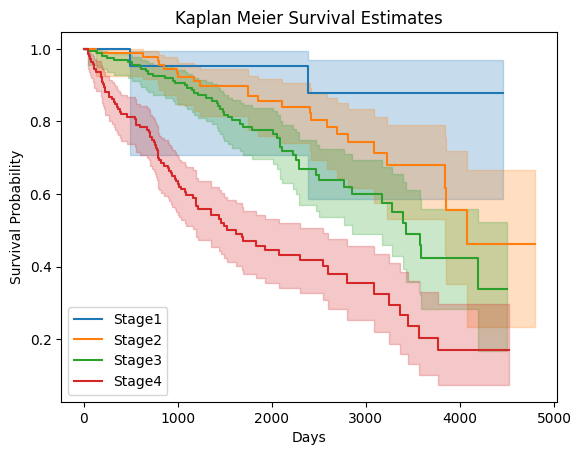

In [27]:
#list of stages
df_stage_list = []
df_stage_list.append(df[df.stage == 1])
df_stage_list.append(df[df.stage == 2])
df_stage_list.append(df[df.stage == 3])
df_stage_list.append(df[df.stage == 4])

#km plots
kmf = KaplanMeierFitter()
for i, stage in enumerate(df_stage_list):
    kmf.fit(stage.n_days, stage.status, label = f'Stage{i+1}')
    kmf.plot()
plt.title('Kaplan Meier Survival Estimates')
plt.xlabel('Days')
plt.ylabel('Survival Probability')

# logrank tests
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import pairwise_logrank_test

results_stages = multivariate_logrank_test(df.n_days, df.stage, df.status)
results_stages_pair = pairwise_logrank_test(df.n_days, df.stage, df.status)
print('===multivariate logrank test===')
print(f'test statistic: {results_stages.test_statistic}')
print(f'p-value: {results_stages.p_value}')
print('')
print('===pairwise logrank test===')
print(results_stages_pair.print_summary)
import math
print(f'Bonferroni adjusted critical value: {round(0.05/math.factorial(len(np.unique(df.stage))), 5)}')
print('')
print('===p-values of pairwise logrank tests===')
for value in results_stages_pair.p_value:
    print(value)

===multivariate logrank test===
test statistic: 68.3024818213053
p-value: 9.855692238530847e-15

===pairwise logrank test===
<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
         test_statistic      p  -log2(p)
0.0 1.0           20.14 <0.005     17.08
    2.0          132.02 <0.005     99.09
1.0 2.0           17.21 <0.005     14.87>
Bonferroni adjusted critical value: 0.00833


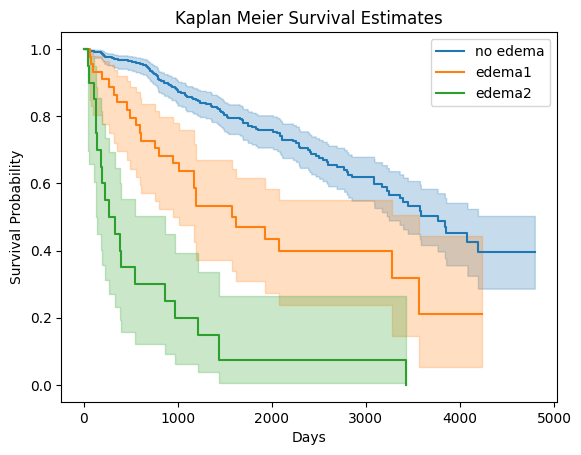

In [28]:
#group by edema severity
df_edema0 = df[(df.edema_1 == 0) & (df.edema_2 == 0)]
df_edema1 = df[df.edema_1 == 1]
df_edema2 = df[df.edema_2 == 1]

#km plots
kmf.fit(df_edema0.n_days, df_edema0.status, label = 'no edema')
kmf.plot()

kmf.fit(df_edema1.n_days, df_edema1.status, label = 'edema1')
kmf.plot()

kmf.fit(df_edema2.n_days, df_edema2.status, label = 'edema2')
kmf.plot()

plt.title('Kaplan Meier Survival Estimates')
plt.xlabel('Days')
plt.ylabel('Survival Probability')

# logrank tests
results_edema = multivariate_logrank_test(df.n_days, (df.edema_1 + 2*df.edema_2), df.status)
print('===multivariate logrank test===')
print(f'test statistic: {results_stages.test_statistic}')
print(f'p-value: {results_stages.p_value}')
print('')

results_edema_pair = pairwise_logrank_test(df.n_days, (df.edema_1 + 2*df.edema_2), df.status)
print('===pairwise logrank test===')
print(results_edema_pair.print_summary)
print(f'Bonferroni adjusted critical value: {round(0.05/math.factorial(3), 5)}')

Interpreting our series of KMplots and log-rank tests above, we notice that males diagnosed with primary biliary cirrhosis generally display lower survival rates than females approximately after the 1000 day mark. In addition, the presence of clinical features such as ascites, hepatomegaly, and spiders correlate with decreased survival outcomes. The survival rates deteriorate even further for patients with edema, and this decline is more pronounced in those who persistently experience edema despite diuretic therapy. Moreover, as the stage of liver cirrhosis advances, the survival prospects diminish. However, because of Bonferroni's adjustment, it is important to note that we couldn't negate the null hypothesis suggesting distinct survival curves for the various disease stages. The sole exception is the curve for stage 4, which statistically differs from all other stages.

These findings align with medical expectations because ascites, hepatomegaly, and spiders are clinical manifestations of advanced liver disease. Their presence indicates significant liver damage, which naturally correlates with poorer survival outcomes. Edema reflects fluid retention, which can be a sign of declining liver function or worsening portal hypertension. Persistent edema despite diuretic treatment underscores the severity of the condition and possibly reduced liver response. Progression through the stages of liver cirrhosis denotes increasing liver damage and dysfunction. As the liver's condition deteriorates, the patient's overall survival rate would decrease.

## Cox Proportional Hazards Model

The Cox Proportional Hazards (PH) model is a regression technique to establish the relationship between the hazard function and a set of covariates, without making any specific assumptions about the form or shape of the hazard function.

The hazard function $h(t)$ is defined as the instantaneous risk of the event occuring, given that the individual is at risk (i.e., the event hasn't occurred yet) at time $t$.
In the Cox PH model, the hazard function for an individual with a given set of covariates $x$ is defined as:

$\Large h(t|x) = h_0(t)exp(\beta^\prime x)$

Where:

- $h(t|x)$ is the hazard at time $t$ for an individual with covariates $x$.
- $h0(t)$ is the baseline hazard function at time $t$. It represents the hazard for an individual with all covariates = 0.
- $\beta$ is a vector of coefficients indicating the change in the log hazard for a one-unit change in the corresponding covariate.
- $x$ is a vector of the covariates

The term exp($\beta_j$) represents the hazard ratio for a one-unit increase in the $j$-th covariate. If exp($\beta_j$) is:
- Equal to 1: The covariate has no effect.
- Greater than 1: The covariate increases the hazard (or risk).
- Less than 1: The covariate decreases the hazard.

### Proportional Hazards Assumption
A fundamental assumption of the Cox Proportional Hazards (PH) model is that the hazard ratios for covariates are constant over time, leading to the term "proportional hazards". This implies that the influence of any covariate is multiplicatively constant on the hazard function. To assess this assumption, we can examine Schoenfeld residuals plotted against time. The Schoenfeld residual for an individual represents the difference between the observed covariate value and its expected value under the risk set at that event time. If the model's proportional hazards assumption is correct, there should be no discernible trend or correlation between these residuals and time. If there is a significant trend in the plot (e.g., an upward or downward slope), it suggests that the effect of the predictor on the hazard is not constant over time, violating the assumption. More formally, this can be statistically tested by analyzing the correlation between the residuals and the ranked survival times. A significant correlation suggests a violation of the proportional hazards assumption.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covar

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 418 total observations, 257 right-censored observations>
         test_name = proportional_hazard_test

---
                      test_statistic      p  -log2(p)
age             km              0.92   0.34      1.56
                rank            0.60   0.44      1.19
albumin         km              1.07   0.30      1.74
                rank            0.97   0.33      1.62
alp             km              3.24   0.07      3.80
                rank            3.88   0.05      4.36
ascites         km              0.11   0.74      0.44
                rank            0.37   0.54      0.88
ast             km              0.05   0.82      0.28
                rank            0.03   0.87      0.21
bilirubin       km              0.24   0.62      0.69
                rank            0.46   0.50      1.01
cholesterol     km              0.23   0.63      0.66
                rank            0.77   0.38      1.39
copper          km              0.35   0.56      0.85
                rank            0.20   0.65      0.62
drug            km              0.25   0.62      0.70
                rank            0.80   0.37      1.43
edema_1         km              2.80   0.09      3.41
                rank            3.35   0.07      3.89
edema_2         km              0.14   0.71      0.50
                rank            0.22   0.64      0.64
hepatomegaly    km              1.21   0.27      1.88
                rank            1.32   0.25      2.00
non_participant km              1.40   0.24      2.08
                rank            1.20   0.27      1.87
platelets       km              0.64   0.42      1.24
                rank            0.50   0.48      1.06
prothrombin     km              8.68 <0.005      8.28
                rank            8.95 <0.005      8.50
sex             km              0.29   0.59      0.76
                rank            0.35   0.55      0.86
spiders         km              0.54   0.46      1.11
                rank            0.36   0.55      0.86
stage           km              1.57   0.21      2.25
                rank            1.24   0.26      1.92
triglycerides   km              1.73   0.19      2.41
                rank            1.81   0.18      2.49



1. Variable 'prothrombin' failed the non-proportional test: p-value is 0.0028.

   Advice 1: the functional form of the variable 'prothrombin' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'prothrombin' using pd.cut, and then specify it in
`strata=['prothrombin', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lif

[[<Axes: xlabel='rank-transformed time\n(p=0.3715)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6152)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.4374)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3386)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5514)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5891)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5434)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7387)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2508)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2715)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5497)'>,
  <Axes: xlabel='km-transformed time\n(p=0.4631)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.4956)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6213)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3808)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6331)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3257)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3003)'>],
 [<Axes: xlabel='rank-transformed tim

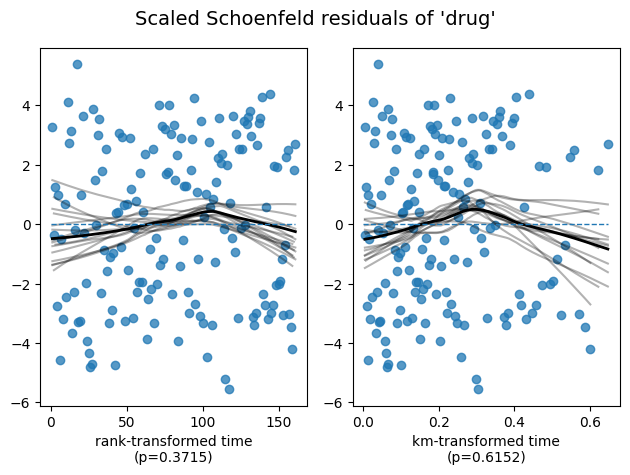

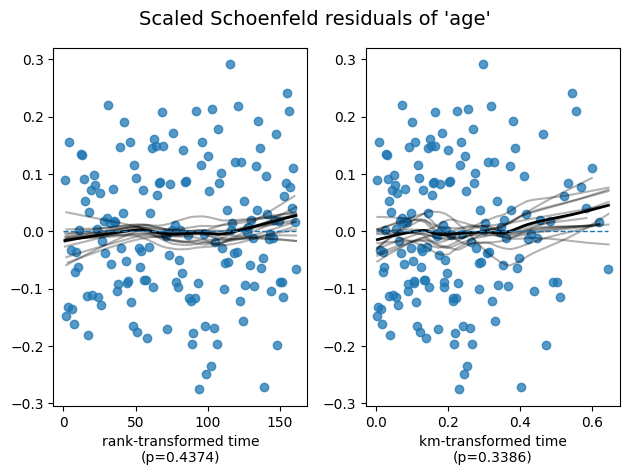

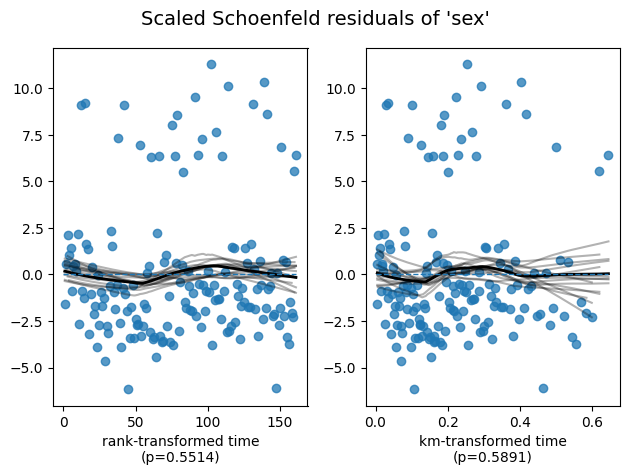

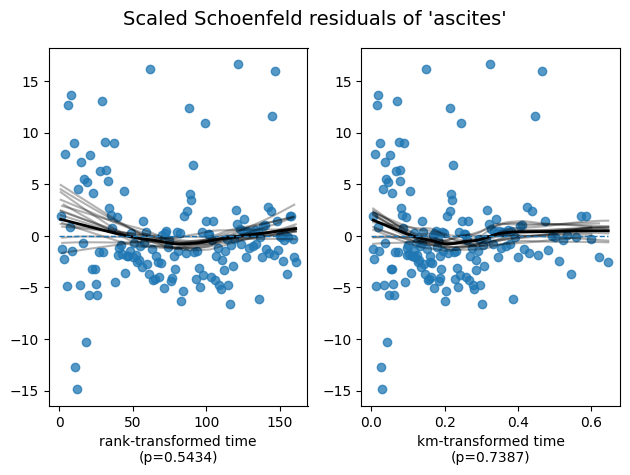

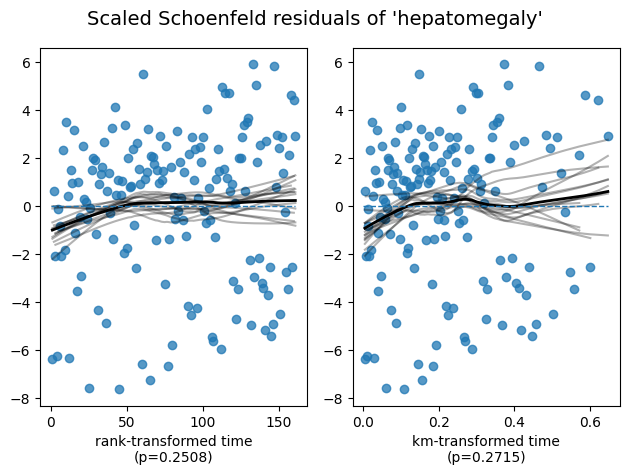

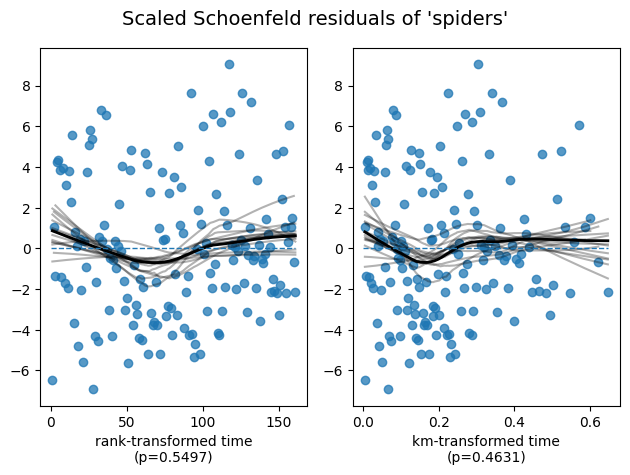

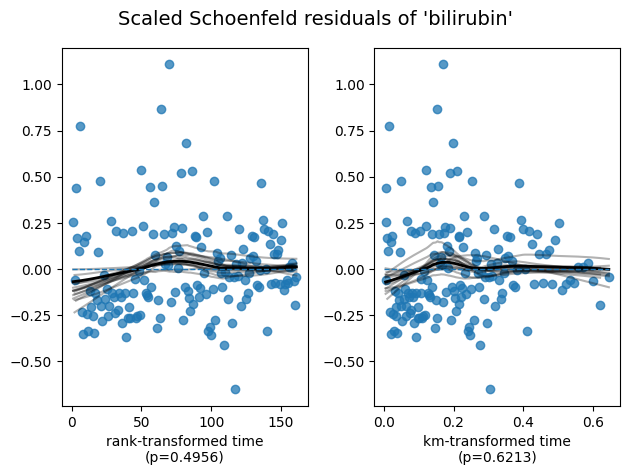

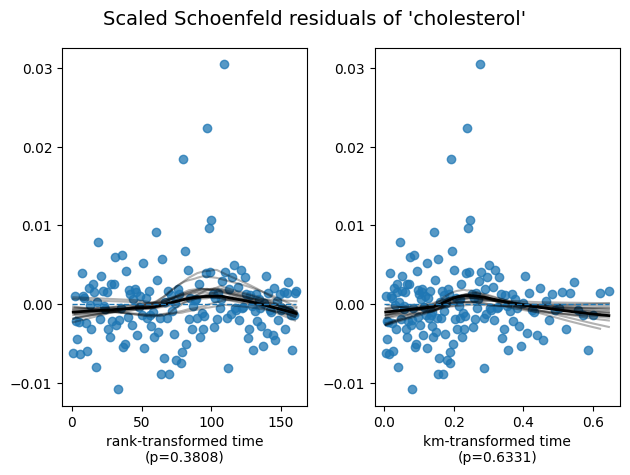

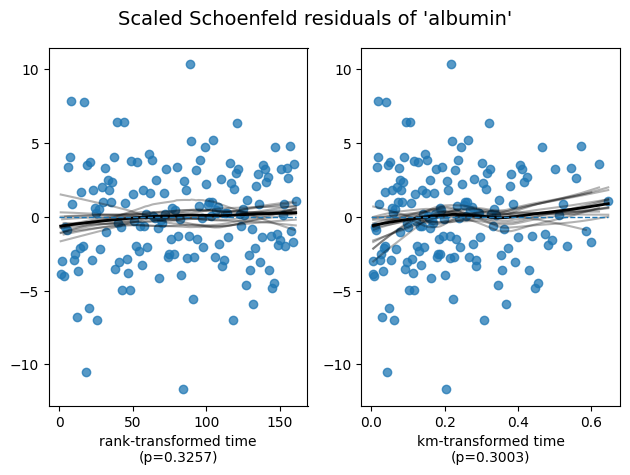

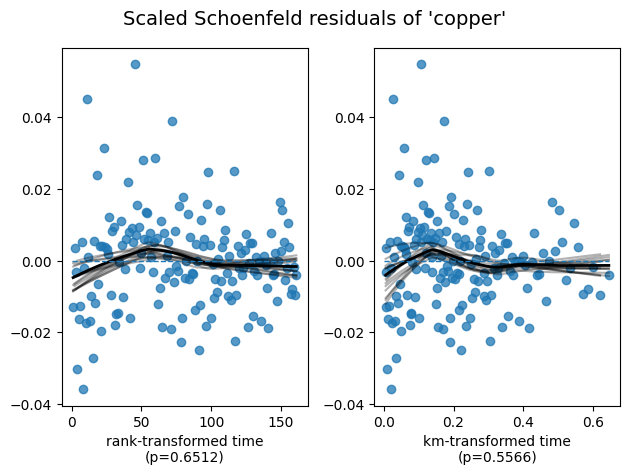

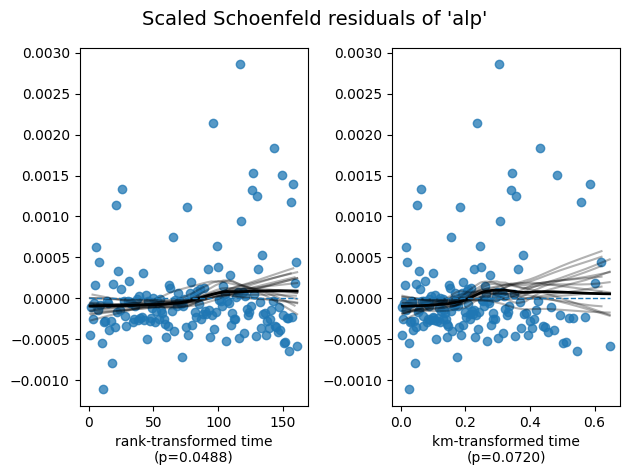

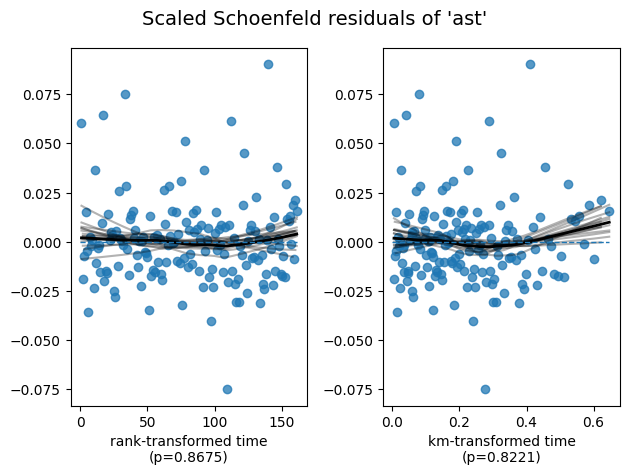

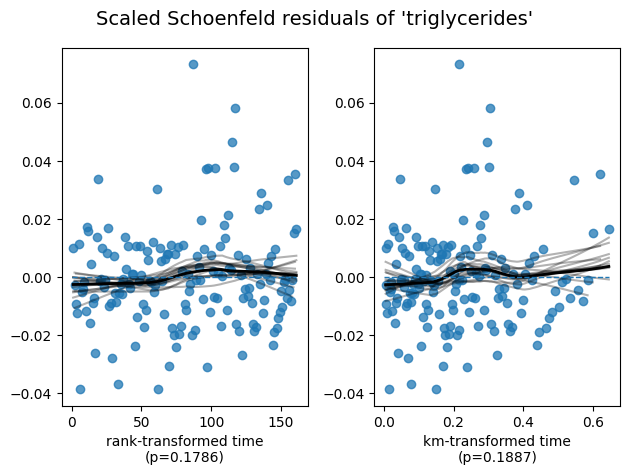

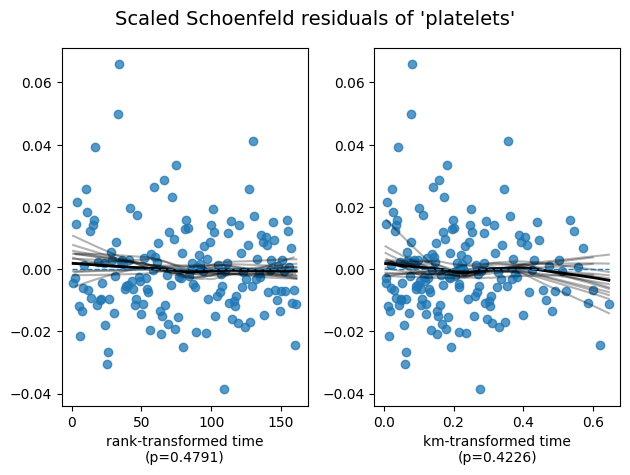

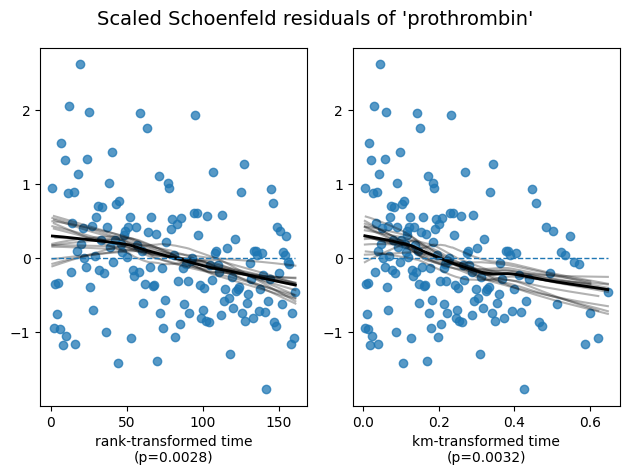

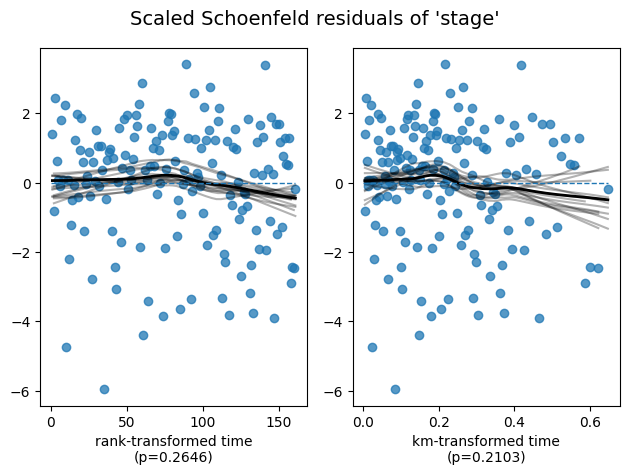

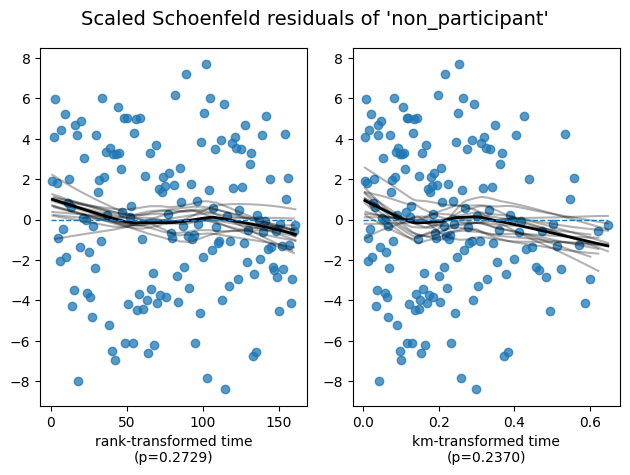

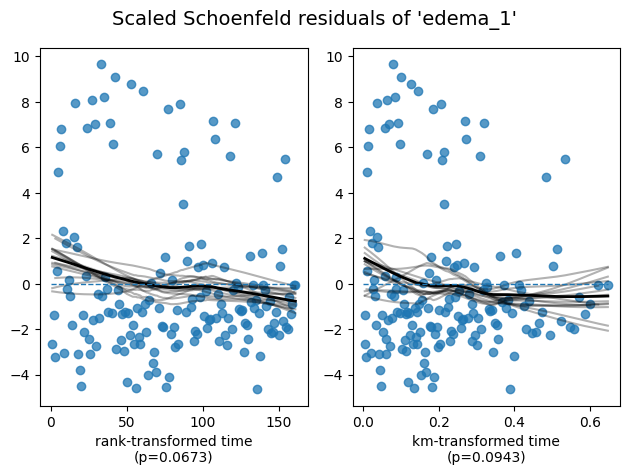

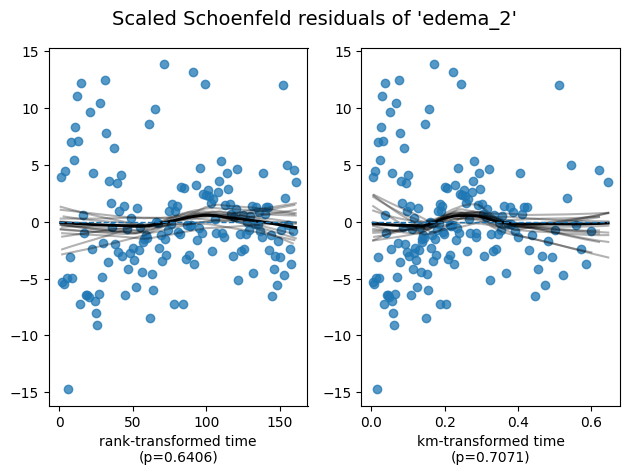

In [29]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df = df, duration_col = 'n_days', event_col = 'status')
cph.check_assumptions(df, show_plots = True)

From the graphs and statistical tests provided, it is evident that the 'prothrombin' variable (p = 0.0028) does not satisfy the proportional hazards (PH) assumption, as indicated by the declining trend in its Schoenfeld residuals over time. While no such violations were apparent for other variables, it is apparent from the earlier Kaplan-Meier plots that the PH assumption has been breached for 'sex' and 'drug' (the survival curves for different categories crossed or diverged over time). To rectify this, one approach is to stratify the model based on 'prothrombin' levels. By doing so, each stratum will have its own unique baseline hazard function, thereby improving the model's precision by accounting for the varying hazard patterns across different levels of 'prothrombin'. To put this into practice, we'll initially sort the 'prothrombin' values into separate strata.

In [30]:
#divide prothrombin into 3 stratas
df_strat = df.copy()
df_strat['prothrombin_strat'] = pd.qcut(df.prothrombin, 3, labels = ['strat1', 'strat2', 'strat3'])

In [31]:
df_strat[['prothrombin', 'prothrombin_strat']].head()

,prothrombin,prothrombin_strat
0,12.2,strat3
1,10.6,strat2
2,12.0,strat3
3,10.3,strat2
4,10.9,strat2


In [32]:
df_strat.drop('prothrombin', axis = 1, inplace = True)


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 418 total observations, 257 right-censored observations>
         test_name = proportional_hazard_test

---
                      test_statistic    p  -log2(p)
age             km              1.31 0.25      1.99
                rank            0.16 0.69      0.55
albumin         km              0.73 0.39      1.35
                rank            6.47 0.01      6.51
alp             km              4.46 0.03      4.85
                rank            0.69 0.41      1.30
ascites         km              0.04 0.84      0.25
                rank            0.35 0.56      0.85
ast             km              0.27 0.60      0.73
                rank            0.00 0.95      0.08
bilirubin       km              0.02 0.89      0.17
                rank            0.18 0.67      0.57
cholesterol     km              0.10 0.75      0.42
                rank            0.55 0.46      1.13
copper          km              0.62 0.43      1.21
                rank            0.45 0.50      1.00
edema_1         km              2.75 0.10      3.36
                rank            1.61 0.21      2.29
edema_2         km              0.58 0.45      1.17
                rank            0.98 0.32      1.64
hepatomegaly    km              0.01 0.91      0.14
                rank            1.34 0.25      2.02
non_participant km              1.25 0.26      1.93
                rank            0.85 0.36      1.49
platelets       km              1.33 0.25      2.00
                rank            0.39 0.53      0.91
spiders         km              1.50 0.22      2.18
                rank            0.40 0.53      0.93
stage           km              1.57 0.21      2.25
                rank            0.57 0.45      1.15
triglycerides   km              0.83 0.36      1.47
                rank            2.16 0.14      2.82



1. Variable 'albumin' failed the non-proportional test: p-value is 0.0110.

   Advice 1: the functional form of the variable 'albumin' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'albumin' using pd.cut, and then specify it in
`strata=['albumin', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May

[[<Axes: xlabel='rank-transformed time\n(p=0.6853)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2521)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5558)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8396)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2469)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9087)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5250)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2201)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6743)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8867)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.4573)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7479)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0110)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3921)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5012)'>,
  <Axes: xlabel='km-transformed time\n(p=0.4329)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.4059)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0347)'>],
 [<Axes: xlabel='rank-transformed tim

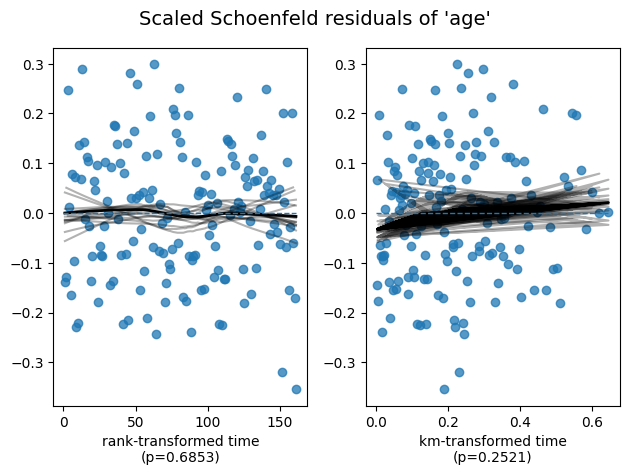

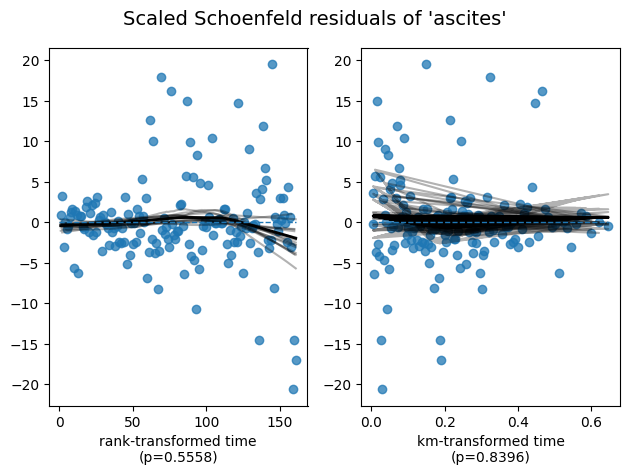

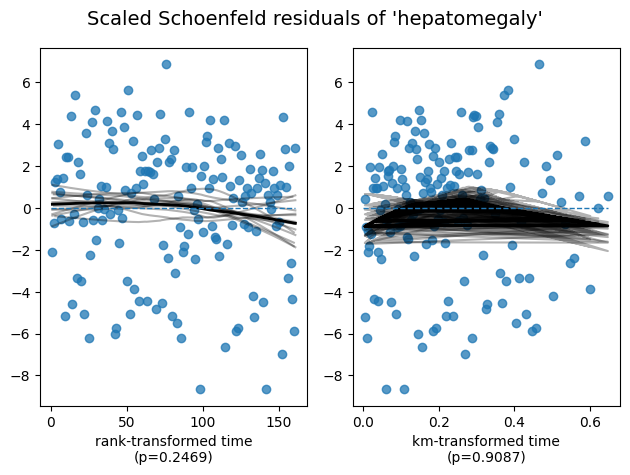

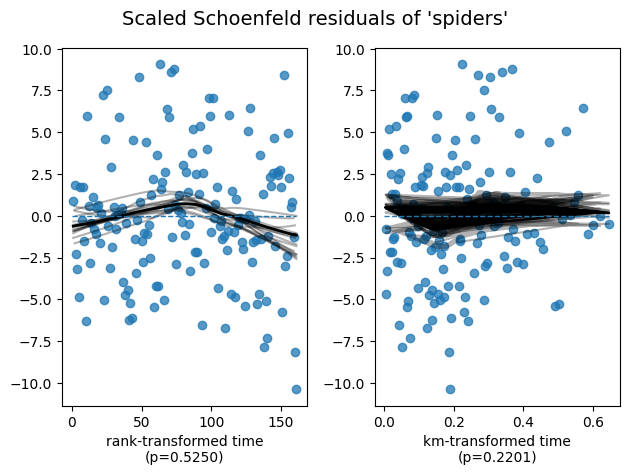

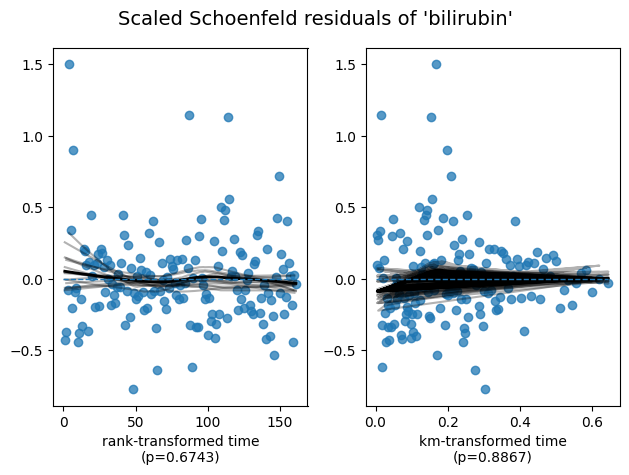

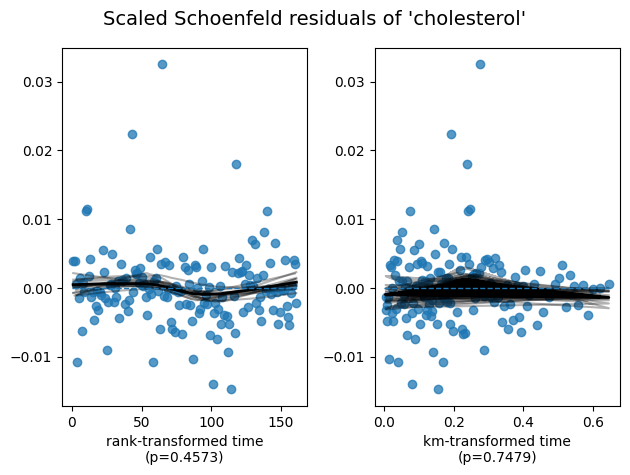

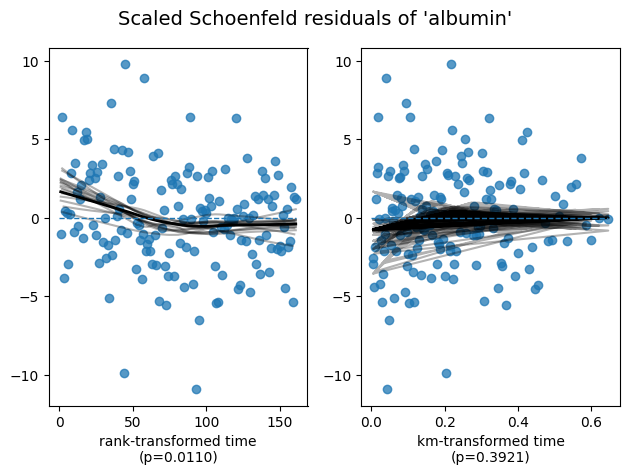

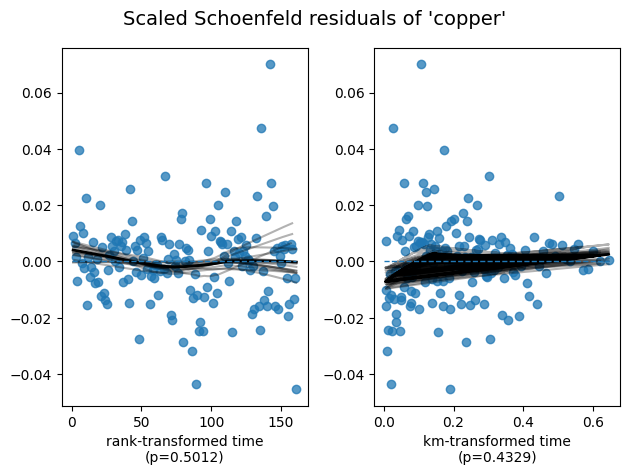

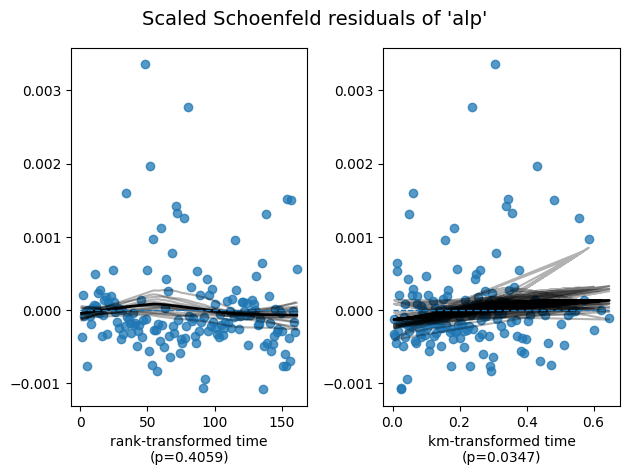

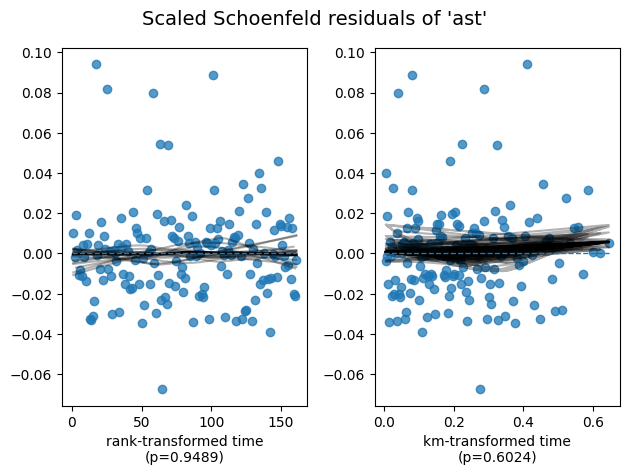

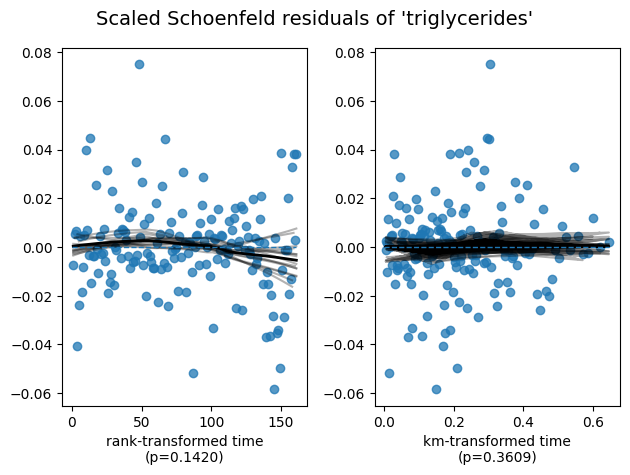

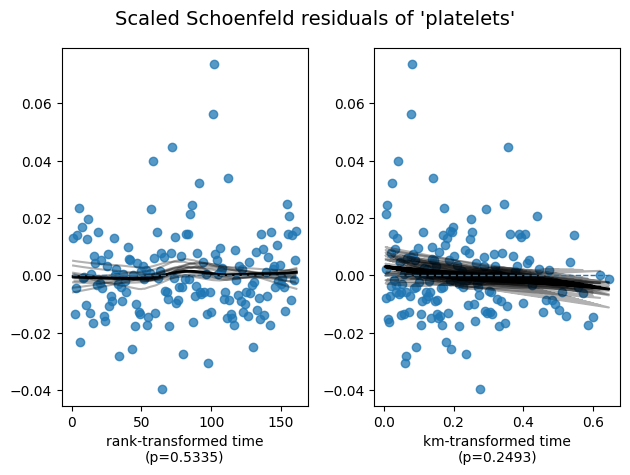

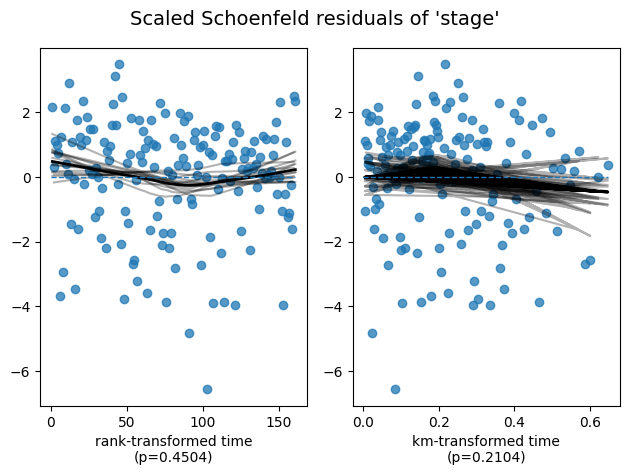

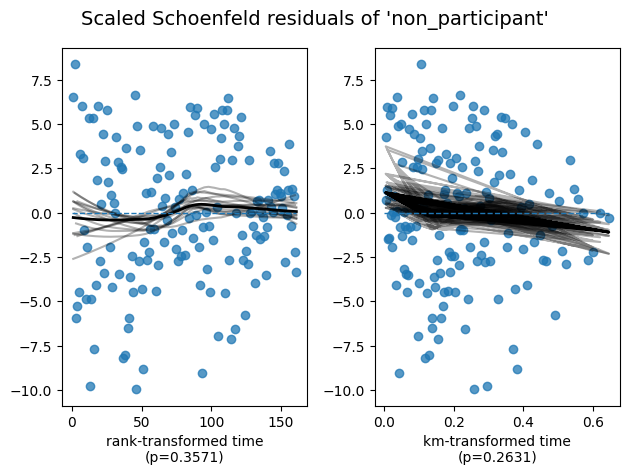

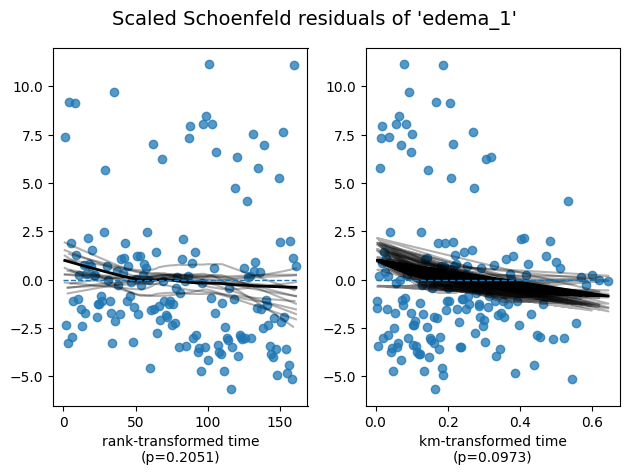

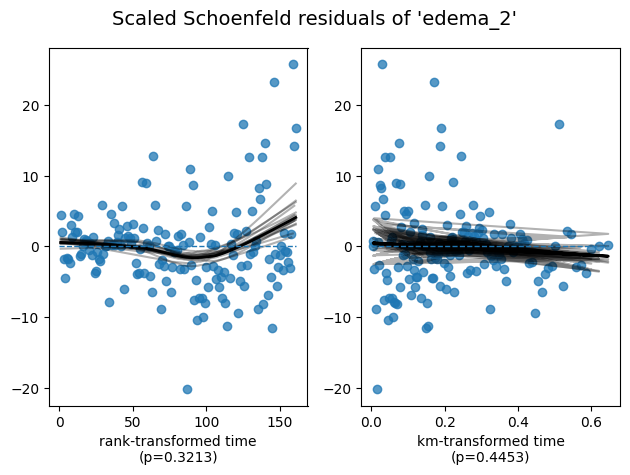

In [33]:
#fit and recheck assumpmtions of stratified model
cph.fit(df = df_strat, duration_col = 'n_days', event_col = 'status', strata = ['prothrombin_strat', 'drug', 'sex'])
cph.check_assumptions(df_strat, show_plots = True)

Although the correlation of schoenfeld residuals' for albumin with rank-transformed time was statistically significant (*p* = 0.0110), the residuals appear to be generally uniform. 
The model satisfies the proportional hazards assumption, allowing us to proceed with interpreting the Cox regression results.
### Cox Regression Model Interpretation

<lifelines.CoxPHFitter: fitted with 418 total observations, 257 right-censored observations>
             duration col = 'n_days'
                event col = 'status'
                   strata = ['prothrombin_strat', 'drug', 'sex']
      baseline estimation = breslow
   number of observations = 418
number of events observed = 161
   partial log-likelihood = -434.24
         time fit was run = 2024-04-18 03:45:09 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
age               0.03       1.03       0.01             0.01             0.05                 1.01                 1.05
ascites           0.50       1.64       0.37            -0.22             1.21                 0.80                 3.36
hepatomegaly      0.20       1.23       0.24            -0.27             0.67                 0.77                 1.96
spiders           0.04       1.04       0.26            -0.46             0.54                 0.63                 1.71
bilirubin         0.08       1.08       0.02             0.03             0.12                 1.03                 1.13
cholesterol       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
albumin          -0.76       0.47       0.23            -1.22            -0.31                 0.30                 0.73
copper            0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
alp              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ast               0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
triglycerides    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
platelets         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
stage             0.43       1.54       0.13             0.17             0.69                 1.19                 2.00
non_participant   0.08       1.08       0.28            -0.47             0.63                 0.62                 1.88
edema_1           0.22       1.24       0.26            -0.30             0.73                 0.74                 2.08
edema_2           0.45       1.57       0.41            -0.35             1.25                 0.71                 3.49

                  cmp to     z      p   -log2(p)
covariate                                       
age                 0.00  3.33 <0.005      10.16
ascites             0.00  1.36   0.17       2.52
hepatomegaly        0.00  0.85   0.40       1.34
spiders             0.00  0.14   0.89       0.18
bilirubin           0.00  3.31 <0.005      10.07
cholesterol         0.00  1.22   0.22       2.17
albumin             0.00 -3.31 <0.005      10.04
copper              0.00  3.43 <0.005      10.68
alp                 0.00 -1.13   0.26       1.94
ast                 0.00  1.84   0.07       3.93
triglycerides       0.00 -1.37   0.17       2.54
platelets           0.00  0.23   0.81       0.30
stage               0.00  3.25 <0.005       9.75
non_participant     0.00  0.28   0.78       0.36
edema_1             0.00  0.83   0.41       1.30
edema_2             0.00  1.11   0.27       1.91
---
Concordance = 0.81
Partial AIC = 900.47
log-likelihood ratio test = 155.87 on 16 df
-log2(p) of ll-ratio test = 80.61

<Axes: xlabel='log(HR) (95% CI)'>

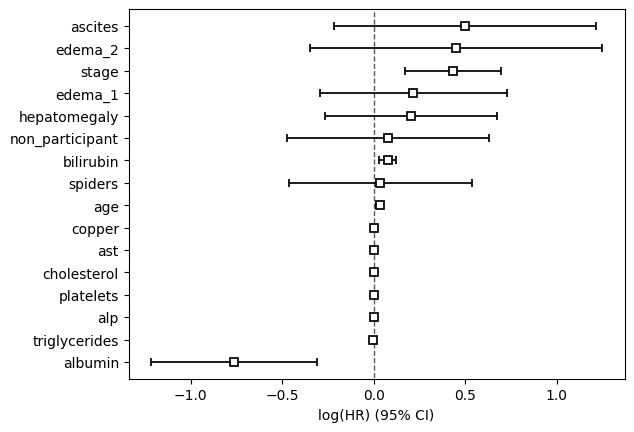

In [34]:
# interpret model
cph.print_summary()
cph.plot()

In [35]:
# read values at higher significant figures
print(cph.hazard_ratios_)
print(np.exp(cph.confidence_intervals_))

covariate
age                1.033677
ascites            1.643937
hepatomegaly       1.226021
spiders            1.037561
bilirubin          1.078993
cholesterol        1.000514
albumin            0.465962
copper             1.003747
alp                0.999951
ast                1.003451
triglycerides      0.998031
platelets          1.000245
stage              1.542215
non_participant    1.081756
edema_1            1.242918
edema_2            1.570729
Name: exp(coef), dtype: float64
                 95% lower-bound  95% upper-bound
covariate                                        
age                     1.013704         1.054042
ascites                 0.803194         3.364726
hepatomegaly            0.765871         1.962636
spiders                 0.629388         1.710444
bilirubin               1.031508         1.128664
cholesterol             0.999688         1.001341
albumin                 0.296260         0.732869
copper                  1.001602         1.005895
alp       

The findings from our Cox regression analysis align with existing medical literature, indicating that bilirubin serves as a potent prognostic marker with a hazard ratio (HR) of 1.08 (95% CI: 1.03 to 1.13; *p* < 0.005). This implies that for each 1mg/dl increase in bilirubin, the hazard rate rises by an average of 8%. Additionally, albumin emerged as another significant predictor of survival, with an HR of 0.47 (95% CI: 0.30 to 0.73; *p* < 0.005) (Pandit & Samant, 2023). This is consistent with the understanding that lower levels of serum albumin often signify advanced liver dysfunction and are linked to a worse prognosis in a range of liver diseases, including PBC. Reduced albumin levels can also result in complications such as edema and ascites, typically indicating more severe disease. Furthermore, copper (HR = 1.0037; 95% CI: 1.0016 to 1.0059; *p* < 0.005) and AST (HR = 1.0035; 95% CI: 0.9998 to 1.0071) were statistically significant in affecting hazard rates. Although the HRs for these variables are small, their effects can compound over a substantial range, resulting in clinically meaningful impacts. As expected, increasing age correlated with poorer outcomes, with each additional year raising the HR by an average of 3% (HR = 1.03; 95% CI: 1.01 to 1.05; *p* < 0.005).

Our earlier KM estimates suggest that edema, ascites, spiders and hepatomegaly tend to worsen prognosis in PBC patients. In the Cox regression analysis, these variables exhibit hazard ratios greater than 1, implying a negative impact on prognosis. However, due to the wide confidence intervals, we cannot conclusively rule out the possibility that these variables have no effect on hazard rates (*p* > 0.05). On the other hand, disease stage shows a significant correlation with increased hazards (HR = 1.54; 95% CI: 1.19 to 2.00; *p* < 0.005).

### Prothrombin Effect
One of the main drawbacks is of stratification in the context of cox regression is that it essentially removes the variable from the list of covariates that are being compared across strata. In other words, we cannot test or estimate a hazard ratio for the stratified variable(s). Since prothrombin was stratified to satisfy the proportional hazards assumption, its hazard ratio was not tested in the model. To understand the effect of prothrombin on the prognosis of PBC patients, we will compute Kaplan-Meier estimates for this variable.

In [36]:
df_strat.prothrombin_strat.value_counts()

strat2    159
strat1    149
strat3    110
Name: prothrombin_strat, dtype: int64

===multivariate logrank test===
test statistic: 65.20638550779358
p-value: 6.92808639099267e-15

===pairwise logrank test===
<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic      p  -log2(p)
strat1 strat2            2.61   0.11      3.24
       strat3           49.90 <0.005     39.17
strat2 strat3           35.78 <0.005     28.75>
Bonferroni adjusted critical value: 0.00833


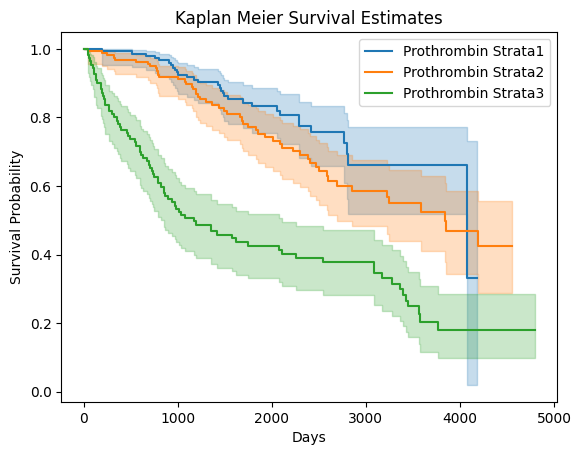

In [37]:
#list of prothrombin strata
prothrombin_strats = []
prothrombin_strats.append(df_strat[df_strat.prothrombin_strat == 'strat1'])
prothrombin_strats.append(df_strat[df_strat.prothrombin_strat == 'strat2'])
prothrombin_strats.append(df_strat[df_strat.prothrombin_strat == 'strat3'])

#km plots
for i, strata in enumerate(prothrombin_strats):
    kmf.fit(strata.n_days, strata.status, label = f'Prothrombin Strata{i+1}')
    kmf.plot()
plt.title('Kaplan Meier Survival Estimates')
plt.xlabel('Days')
plt.ylabel('Survival Probability')

# logrank tests
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import pairwise_logrank_test

results_prothrombin = multivariate_logrank_test(df_strat.n_days, df_strat.prothrombin_strat, df.status)
results_prothrombin_pair = pairwise_logrank_test(df_strat.n_days, df_strat.prothrombin_strat, df.status)
print('===multivariate logrank test===')
print(f'test statistic: {results_prothrombin.test_statistic}')
print(f'p-value: {results_prothrombin.p_value}')
print('')
print('===pairwise logrank test===')
print(results_prothrombin_pair.print_summary)
print(f'Bonferroni adjusted critical value: {round(0.05/math.factorial(len(np.unique(df_strat.prothrombin_strat))), 5)}')

Based on the Survival curves and test statistics, we observe the trend that survival rates decrease as prothrombin increases. In particular, patients in the highest third of prothrombin values demonstrate notably poorer survival outcomes compared to those with lower levels of prothrombin.

## Conclusions
Consistent with current medical literature, our analysis corroborates that factors such as advanced age, increased levels of bilirubin, copper, and AST are linked to poorer prognosis in patients with PBC. Lower levels of albumin were also associated with less favorable outcomes.  Our Kaplan-Meier estimates further revealed that the presence of ascites, hepatomegaly, and spiders are indicative of a worse prognosis. Moreover, higher prothromboin levels, escalating severity of edema, and advancing stages of the disease were also linked to less favorable survival outcomes. Additionally, our analysis found that long-term survival rates did not improve for PBC patients treated with D-penicillamine compared to placebo.

## References
1. Björnsson, E., Kalaitzakis, E., Neuhauser, M., Enders, F., Maetzel, H., Chapman, R. W., Talwalkar, J., Lindor, K., & Jorgensen, R. (2010). Fatigue measurements in patients with primary biliary cirrhosis and the risk of mortality during follow-up. Liver international : official journal of the International Association for the Study of the Liver, 30(2), 251–258. https://doi.org/10.1111/j.1478-3231.2009.02160.x

2. Carbone, M., Mells, G. F., Pells, G., Dawwas, M. F., Newton, J. L., Heneghan, M. A., Neuberger, J. M., Day, D. B., Ducker, S. J., UK PBC Consortium, Sandford, R. N., Alexander, G. J., & Jones, D. E. (2013). Sex and age are determinants of the clinical phenotype of primary biliary cirrhosis and response to ursodeoxycholic acid. Gastroenterology, 144(3), 560–e14. https://doi.org/10.1053/j.gastro.2012.12.005

3. Fedesoriano. (August 2021). Cirrhosis Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.

4. Fleming, T.R. and Harrington, D.P. (1991) Counting Processes and Survival Analysis. Wiley Series in Probability and Mathematical Statistics: Applied Probability and Statistics, John Wiley and Sons Inc., New York.

5. Lindor, K. D., Gershwin, M. E., Poupon, R., Kaplan, M., Bergasa, N. V., & Heathcote, E. J. (2009). Primary biliary cirrhosis. Hepatology, 50(1), 291-308.

6. Pandit S, Samant H. Primary Biliary Cholangitis. [Updated 2023 Feb 12]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2023 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK459209/

